## Usco Brightness Temp

In [11]:
#importsss 
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sympy import diff as dif

from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling.powerlaws import BrokenPowerLaw1D, SmoothlyBrokenPowerLaw1D, PowerLaw1D
from astropy.modeling import fitting, models

In [12]:
data = (

[59755.22,	2.6,	0.005,	0.036],
[59755.22,	3.4,	0.0002,	0.022],
[59755.22,	5.1,	0.013,	0.023],
[59755.22,	7.0,	0.061,	0.019],
[59755.22,	13.7,	0.211,	0.027],
[59755.22,	16.5,	0.216,	0.032],
[59755.22,	31.1,	0.424,	0.081],
[59755.22,	34.9,	0.452,	0.099],
[59769.25,	2.6,	0.019,	0.032],
[59769.25,	3.4,	0.013,	0.028],
[59769.25,	5.1,	0.065,	0.031],
[59769.25,	7.0,	0.115,	0.029],
[59769.25,	13.7,	0.125,	0.031],
[59769.25,	16.5,	0.169,	0.029],
[59769.25,	31.1,	0.010,	0.099],
[59769.25,	34.9,	0.193,	0.126],
[59776.14,	2.6,	0.002,	0.009],
[59776.14,	3.4,	0.010,	0.015],
[59776.14,	5.1,	0.017,	0.010],
[59776.14,	7.0,	0.057,	0.026],
[59776.14,	13.7,	0.105,	0.012],
[59776.14,	16.5,	0.108,	0.013],
[59776.14,	31.1,	0.185,	0.044],
[59776.14,	34.9,	0.152,	0.052],
[59796.03,	2.6,	-0.008,	0.038],
[59796.03,	3.4,	0.026,	0.025],
[59796.03,	5.1,	0.024,	0.022],
[59796.03,	7.0,	0.030,	0.020],
[59796.03,	13.7,	0.048,	0.025],
[59796.03,	16.5,	0.042,	0.029],
[59796.03,	31.1,	0.103,	0.072],
[59796.03,	34.9,	0.009,	0.083],
[59815.03,	2.6,	0.020,	0.057],
[59815.03,	3.4,	0.018,	0.027],
[59815.03,	5.1,	0.025,	0.024],
[59815.03,	7.0,	0.020,	0.023],
[59815.03,	13.7,	0.014,	0.022],
[59815.03,	16.5,	0.023,	0.027],
[59815.03,	31.1,	0.035,	0.065],
[59815.03,	34.9,	0.026,	0.070]

)

df =  pd.DataFrame(data, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

In [13]:
f2_6 = (
 [59755.22,	2.6,	0.005,	0.036],
    [59769.25,	2.6,	0.019,	0.032],
    [59776.14,	2.6,	0.002,	0.009],
    [59796.03,	2.6,	-0.008,	0.038],
    [59815.03,	2.6,	0.020,	0.057],
)

f3_4 = (
[59755.22,	3.4,	0.0002,	0.022],
    [59769.25,	3.4,	0.013,	0.028],
    [59776.14,	3.4,	0.010,	0.015],
    [59796.03,	3.4,	0.026,	0.025],
    [59815.03,	3.4,	0.018,	0.027],
)

f5_1 = (
[59755.22,	5.1,	0.013,	0.023],
    [59769.25,	5.1,	0.065,	0.031],
    [59776.14,	5.1,	0.017,	0.010],
    [59796.03,	5.1,	0.024,	0.022],
    [59815.03,	5.1,	0.025,	0.024],
)

f7 = (
[59755.22,	7.0,	0.061,	0.019],
    [59769.25,	7.0,	0.115,	0.029],
    [59776.14,	7.0,	0.057,	0.026],
    [59796.03,	7.0,	0.030,	0.020],
    [59815.03,	7.0,	0.020,	0.023],
)

f13_7 = (
[59755.22,	13.7,	0.211,	0.027],
    [59769.25,	13.7,	0.125,	0.031],
    [59776.14,	13.7,	0.105,	0.012],
    [59796.03,	13.7,	0.048,	0.025],
    [59815.03,	13.7,	0.014,	0.022],
)

f16_5 = (
[59755.22,	16.5,	0.216,	0.032],
    [59769.25,	16.5,	0.169,	0.029],
    [59776.14,	16.5,	0.108,	0.013],
    [59796.03,	16.5,	0.042,	0.029],
    [59815.03,	16.5,	0.023,	0.027],
)

f31_1 = (
[59755.22,	31.1,	0.424,	0.081],
    [59769.25,	31.1,	0.010,	0.099],
    [59776.14,	31.1,	0.185,	0.044],
    [59796.03,	31.1,	0.103,	0.072],
    [59815.03,	31.1,	0.035,	0.065],
)

f34_9 = (
[59755.22,	34.9,	0.452,	0.099],
    [59769.25,	34.9,	0.193,	0.126],
    [59776.14,	34.9,	0.152,	0.052],
    [59796.03,	34.9,	0.009,	0.083],
    [59815.03,	34.9,	0.026,	0.070]
)



In [14]:
df2_6 =  pd.DataFrame(f2_6, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df3_4 =  pd.DataFrame(f3_4, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df5_1 =  pd.DataFrame(f5_1, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df7 =  pd.DataFrame(f7, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df13_7 =  pd.DataFrame(f13_7, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df16_5 =  pd.DataFrame(f16_5, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df31_1 =  pd.DataFrame(f31_1, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df34_9 =  pd.DataFrame(f34_9, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

### Eruption on MJD 59736.72 (from Moriyama M., 2022, vsnet-alert 26798)

In [43]:
mask1 = df2_6['Fluxdensity(mJy)'] > 3 * np.sqrt(df2_6["error(mJy)"]**2 + (df2_6["Fluxdensity(mJy)"]*0.05)**2) #don't show the non-detections
days2_6 = df2_6['MJD'][mask1] - 59736.72
flux2_6 = df2_6["Fluxdensity(mJy)"][mask1]
flux_err2_6 = np.sqrt(df2_6["error(mJy)"][mask1]**2 + (df2_6["Fluxdensity(mJy)"][mask1]*0.05)**2)

mask2 = df3_4['Fluxdensity(mJy)'] > 3 * np.sqrt(df3_4["error(mJy)"]**2 + (df3_4["Fluxdensity(mJy)"]*0.05)**2) #don't show the non-detections
days3_4 = df3_4['MJD'][mask2] - 59736.72
flux3_4 = df3_4["Fluxdensity(mJy)"][mask2]
flux_err3_4 = np.sqrt(df3_4["error(mJy)"][mask2]**2 + (df3_4["Fluxdensity(mJy)"][mask2]*0.05)**2)

mask3 = df5_1['Fluxdensity(mJy)'] > 3 * np.sqrt(df5_1["error(mJy)"]**2 + (df5_1["Fluxdensity(mJy)"]*0.05)**2) #don't show the non-detections
days5_1 = df5_1['MJD'][mask3] - 59736.72
flux5_1 = df5_1["Fluxdensity(mJy)"][mask3]
flux_err5_1 = np.sqrt(df5_1["error(mJy)"][mask3]**2 + (df5_1["Fluxdensity(mJy)"][mask3]*0.05)**2)

mask4 = df7['Fluxdensity(mJy)'] > 3 * np.sqrt(df7["error(mJy)"]**2 + (df7["Fluxdensity(mJy)"]*0.05)**2) #don't show the non-detections
days7 = df7['MJD'][mask4] - 59736.72
flux7 = df7["Fluxdensity(mJy)"][mask4]
flux_err7 = np.sqrt(df7["error(mJy)"][mask4]**2 + (df7["Fluxdensity(mJy)"][mask4]*0.05)**2)


mask5 = df13_7['Fluxdensity(mJy)'] > 3 * np.sqrt(df13_7["error(mJy)"]**2 + (df13_7["Fluxdensity(mJy)"]*0.1)**2) #don't show the non-detections
days13_7 = df13_7['MJD'][mask5] - 59736.72
flux13_7 = df13_7["Fluxdensity(mJy)"][mask5]
flux_err13_7 = np.sqrt(df13_7["error(mJy)"][mask5]**2 + (df13_7["Fluxdensity(mJy)"][mask5]*0.1)**2)

mask6 = df16_5['Fluxdensity(mJy)'] > 3 * np.sqrt(df16_5["error(mJy)"]**2 + (df16_5["Fluxdensity(mJy)"]*0.1)**2) #don't show the non-detections
days16_5 = df16_5['MJD'][mask6] - 59736.72
flux16_5 = df16_5["Fluxdensity(mJy)"][mask6]
flux_err16_5 = np.sqrt(df16_5["error(mJy)"][mask6]**2 + (df16_5["Fluxdensity(mJy)"][mask6]*0.1)**2)

mask7 = df31_1['Fluxdensity(mJy)'] > 3 * np.sqrt(df31_1["error(mJy)"]**2 + (df31_1["Fluxdensity(mJy)"]*0.1)**2) #don't show the non-detections
days31_1 = df31_1['MJD'][mask7] - 59736.72
flux31_1 = df31_1["Fluxdensity(mJy)"][mask7]
flux_err31_1 = np.sqrt(df31_1["error(mJy)"][mask7]**2 + (df31_1["Fluxdensity(mJy)"][mask7]*0.1)**2)

mask8 = df34_9['Fluxdensity(mJy)'] > 3 * np.sqrt(df34_9["error(mJy)"]**2 + (df34_9["Fluxdensity(mJy)"]*0.1)**2) #don't show the non-detections
days34_9 = df34_9['MJD'][mask8] - 59736.72
flux34_9 = df34_9["Fluxdensity(mJy)"][mask8]
flux_err34_9 = np.sqrt(df34_9["error(mJy)"][mask8]**2 + (df34_9["Fluxdensity(mJy)"][mask8]*0.1)**2)

## Now to find brightness temp

In [56]:
###distance is 6.56 + 3.17 - 4.02 kpc

# Velocity is

In [45]:
Vlow =  650* 100000
Vhigh =  850* 100000
Distlow = 2.54 *  3.086*10**21    
Disthigh =   9.73*  3.086*10**21    

Dist =   6.56 * 3.086*10**21              #distance in cm
V_const =  750 * 100000        #velocity in cm/s


In [46]:
def Con_TB(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(V_const * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Dist)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)
        

In [47]:
nu0 = 2.6 #FREQUENCY 1
nu1 = 7 #frequency 2
nu2 = 16.5 #frequency 3
nu3 = 31.1  #freq 4


date_CAC_sec_n0 = days2_6 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))
date_CAC_sec_n1 = days7 * 86400    #time in seconds 
date_CAC_sec_n2 = days16_5 * 86400    #time in seconds 
date_CAC_sec_n3 = days31_1 * 86400

In [48]:
CTB_nu0, CTBError_nu0 = Con_TB(flux2_6, date_CAC_sec_n0, flux_err2_6, nu0)

CTB_nu1, CTBError_nu1 = Con_TB(flux7, date_CAC_sec_n1, flux_err7, nu1)

CTB_nu2, CTBError_nu2 = Con_TB(flux16_5, date_CAC_sec_n2, flux_err16_5, nu2)

CTB_nu3, CTBError_nu3 = Con_TB(flux31_1, date_CAC_sec_n3, flux_err31_1, nu3)

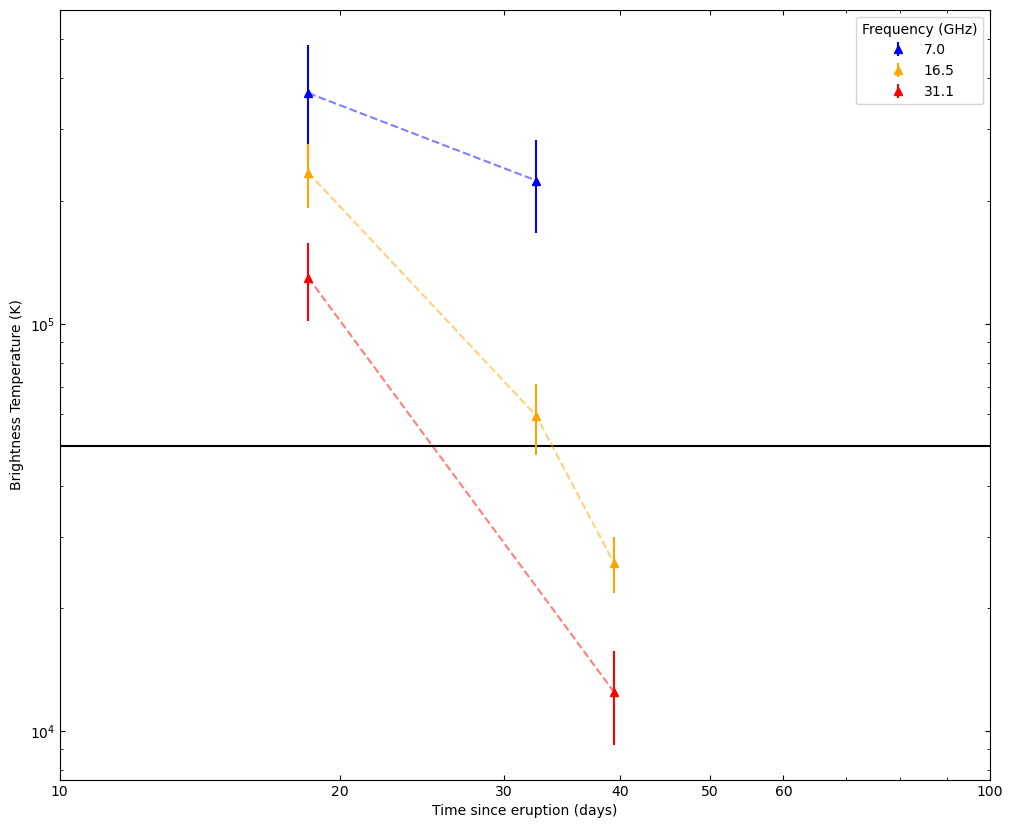

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)

ax.axhline(y=5*10**4, color='black', linestyle='-', linewidth=1.5)

#using a function to plot the detections only
# Store which labels have already been used
used_labels = set()

def plot(days, CTBs, CTBerrors, fluxes, errors, color, label_name):
    for day, CTB, CTBerr, flux, err in zip(days, CTBs, CTBerrors, fluxes, errors):
        if flux < 3 * err:
            fmt = 'x'  # square for non-detection
            label = None  # no label for non-detections
            ax.errorbar(day, CTB, fmt=fmt, color=color, label=label)
            
        else:
            fmt = '^'  # triangle for detection
            label = label_name if label_name not in used_labels else None
        
            ax.errorbar(day, CTB, yerr=CTBerr, fmt=fmt, color=color, label=label)
        
        if label:
            used_labels.add(label)


plot(days2_6, CTB_nu0, CTBError_nu0, flux2_6, flux_err2_6,'green', '2.6')
ax.plot(days2_6[0:27], CTB_nu0[0:27], color='green', linestyle = '--', alpha=.50)

plot(days7, CTB_nu1, CTBError_nu1, flux7, flux_err7,'blue', '7.0')
ax.plot(days7[0:30], CTB_nu1[0:30], color='blue', linestyle = '--', alpha=.50)

plot(days16_5, CTB_nu2, CTBError_nu2, flux16_5, flux_err16_5,'orange', '16.5')
ax.plot(days16_5[0:30], CTB_nu2[0:30], color='orange', linestyle = '--', alpha=.50)

plot(days31_1, CTB_nu3, CTBError_nu3, flux31_1, flux_err31_1,'red', '31.1')
ax.plot(days31_1[0:30], CTB_nu3[0:30], color='red', linestyle = '--', alpha=.50)


ax.set_xscale('log')
ax.set_xticks([10,20,30,40,50,60,100], labels = ['10','20','30','40','50','60','100'])
ax.set_yscale('log')
#ax.set_yticks([.1,1,10], labels = ['0.1','1.0','10.0'])
ax.set_xlabel("Time since eruption (days)")
ax.set_ylabel("Brightness Temperature (K)")


ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_title("")
plt.legend(title='Frequency (GHz)')
plt.show();

## Now to get the high and low from the most limited freq (smallest)

In [51]:
def Con_TBlow(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vhigh * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Distlow)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)



def Con_TBhigh(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vlow * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Disthigh)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)
        

In [52]:
nu7 = 7
date_CAC_sec_n7 = days7 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))

In [53]:
CTB_nuhigh, CTBError_nuhigh = Con_TBhigh(flux7, date_CAC_sec_n7, flux_err7, nu7)
print(CTB_nuhigh)

[np.float64(1078907.1291718613), np.float64(657850.7867409837)]


In [54]:
CTB_nulow, CTBError_nulow = Con_TBlow(flux7, date_CAC_sec_n7, flux_err7, nu7)
print(CTB_nulow)

[np.float64(42994.67568837082), np.float64(26215.49201271685)]


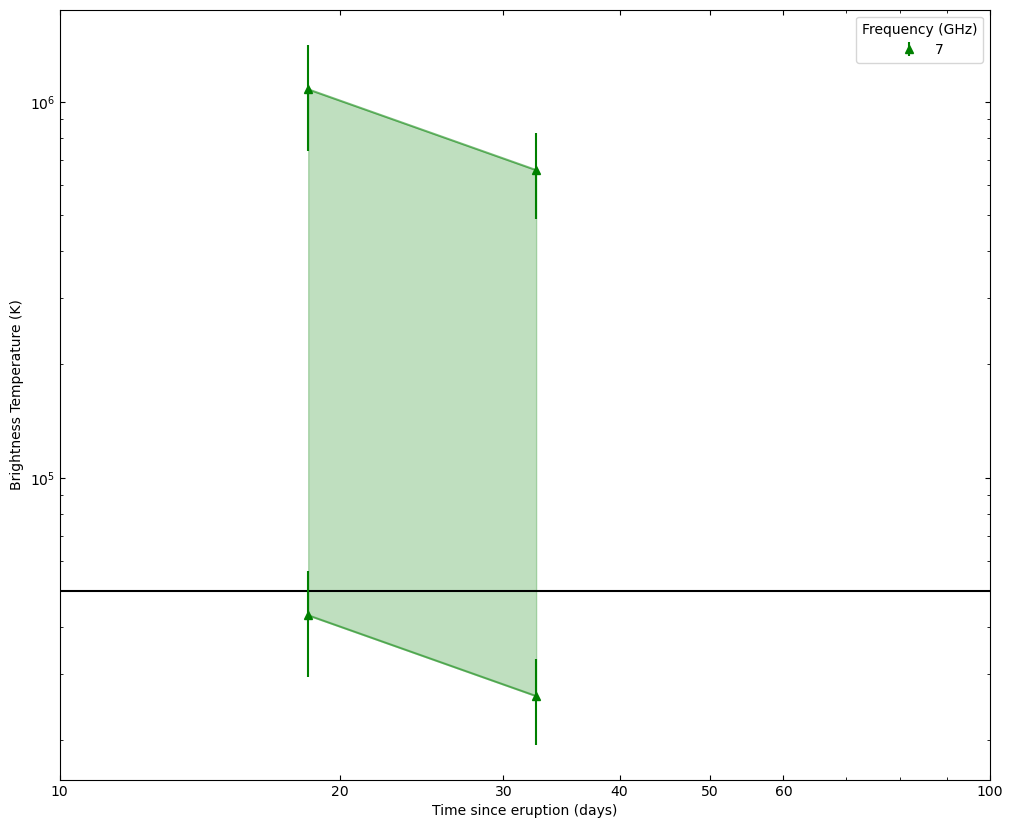

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)

ax.axhline(y=5*10**4, color='black', linestyle='-', linewidth=1.5)

#using a function to plot the detections only
# Store which labels have already been used
used_labels = set()

def plot(days, CTBs, CTBerrors, fluxes, errors, color, label_name):
    for day, CTB, CTBerr, flux, err in zip(days, CTBs, CTBerrors, fluxes, errors):
        if flux < 3 * err:
            fmt = 'x'  # square for non-detection
            label = None  # no label for non-detections
            ax.errorbar(day, CTB, fmt=fmt, color=color, label=label)
            
        else:
            fmt = '^'  # triangle for detection
            label = label_name if label_name not in used_labels else None
        
            ax.errorbar(day, CTB, yerr=CTBerr, fmt=fmt, color=color, label=label)
        
        if label:
            used_labels.add(label)


plot(days7, CTB_nuhigh, CTBError_nuhigh, flux7, flux_err7,'green', '7')
ax.plot(days7[0:27], CTB_nuhigh[0:27], color='green', linestyle = '-', alpha=.50)

plot(days7, CTB_nulow, CTBError_nulow, flux7, flux_err7,'green', '7')
ax.plot(days7[0:27], CTB_nulow[0:27], color='green', linestyle = '-', alpha=.50)

ax.fill_between(days7, CTB_nulow, CTB_nuhigh, alpha=.25, color='green')

ax.set_xscale('log')
ax.set_xticks([10,20,30,40,50,60,100], labels = ['10','20','30','40','50','60','100'])
ax.set_yscale('log')
#ax.set_yticks([.1,1,10], labels = ['0.1','1.0','10.0'])
ax.set_xlabel("Time since eruption (days)")
ax.set_ylabel("Brightness Temperature (K)")


ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_title("")
plt.legend(title='Frequency (GHz)')
plt.show();